In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [2]:
scalek = 1.2
FIGSIZE = (6.4*scalek, 4.8*scalek)

plt.rcParams.update({'font.size': 16})

In [3]:
def plot_with_curve_fit(x, y, fun, axis_set_options={}, estimate_plot_options={}, true_plot_options={}, save_as=None):
    fig, ax = plt.subplots(figsize=FIGSIZE)
    
    # add options if missing
    if "linestyle" not in estimate_plot_options:
        estimate_plot_options["linestyle"] = 'dashed'
    if "color" not in estimate_plot_options:
        estimate_plot_options["color"] = 'black'
    
    if "marker" not in true_plot_options:
        true_plot_options["marker"] = "o"
    if "linestyle" not in true_plot_options:
        true_plot_options["linestyle"] = 'None'
    if "color" not in true_plot_options:
        true_plot_options["color"] = "red"
        
    # get curve approx
    coefs, _ = curve_fit(fun, x, y)
    
    ax.set(**axis_set_options)
    ax.plot(x, fun(x, *coefs), **estimate_plot_options)
    if "label" in estimate_plot_options:
        ax.legend()
    ax.plot(x, y, **true_plot_options)
    if "label" in true_plot_options:
        ax.legend()
    
    if save_as is None:
        plt.plot()
    else:
        plt.savefig(save_as)

## N.States

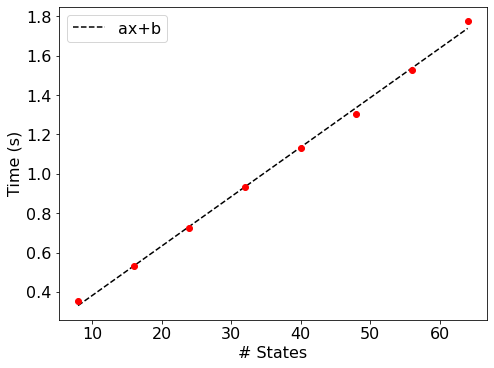

In [4]:
df_states = pd.read_csv("./Results/Parsed/increasing-states-fixed-others.csv", index_col=0)
df_states = df_states.groupby("# States").mean()[["Time(s)", "Player-0 Data Sent(MB)", "Global Data Sent(MB)"]]

plot_with_curve_fit(
    df_states.index, 
    df_states["Time(s)"], 
    lambda x,a,b: a*x+b,
    axis_set_options={
        "xlabel": "# States",
        "ylabel": "Time (s)",
    },
    estimate_plot_options={
        "label": "ax+b"
    },
    true_plot_options={
    },
    save_as="var_states_time_plot"
)

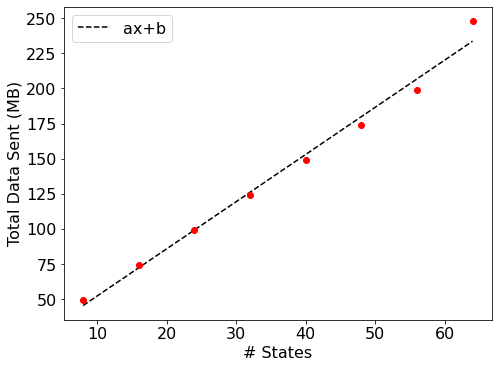

In [5]:
df_states = pd.read_csv("./Results/Parsed/increasing-states-fixed-others.csv", index_col=0)
df_states = df_states.groupby("# States").mean()[["Time(s)", "Player-0 Data Sent(MB)", "Global Data Sent(MB)"]]

plot_with_curve_fit(
    df_states.index, 
    df_states["Global Data Sent(MB)"], 
    lambda x,a,b: a*x+b,
    axis_set_options={
        "xlabel": "# States",
        "ylabel": "Total Data Sent (MB)",
    },
    estimate_plot_options={
        "label": "ax+b"
    },
    true_plot_options={
    },
    save_as="var_states_total_data_sent_plot"
)

## N.Symbols

In [6]:
df_symbols = pd.read_csv("./Results/Parsed/increasing-symbols-fixed-others.csv", index_col=0)
df_symbols = df_symbols.groupby("# Symbols").mean()[["Time(s)", "Player-0 Data Sent(MB)", "Global Data Sent(MB)"]]

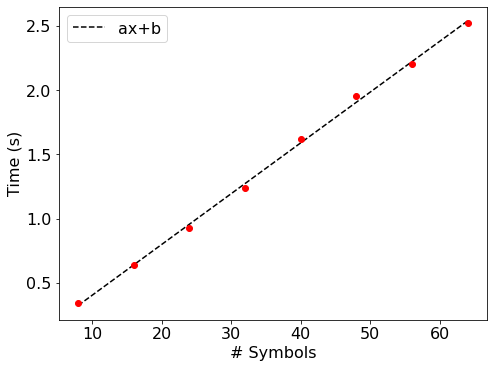

In [7]:
plot_with_curve_fit(
    df_symbols.index, 
    df_symbols["Time(s)"], 
    lambda x,a,b: a*x+b,
    axis_set_options={
        "xlabel": "# Symbols",
        "ylabel": "Time (s)",
    },
    estimate_plot_options={
        "label": "ax+b"
    },
    true_plot_options={
    },
    save_as="var_symbols_time_plot"
)

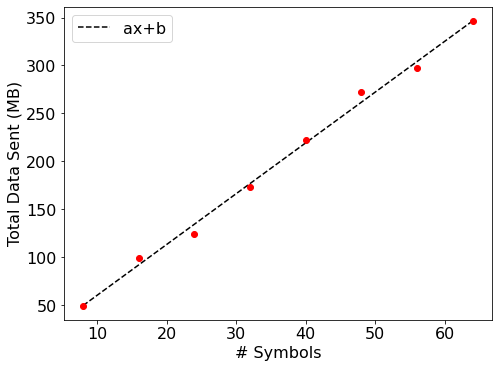

In [8]:
plot_with_curve_fit(
    df_symbols.index, 
    df_symbols["Global Data Sent(MB)"], 
    lambda x,a,b: a*x+b,
    axis_set_options={
        "xlabel": "# Symbols",
        "ylabel": "Total Data Sent (MB)",
    },
    estimate_plot_options={
        "label": "ax+b"
    },
    true_plot_options={
    },
    save_as="var_symbols_total_data_sent_plot"
)

## String Length

In [9]:
df_string = pd.read_csv("./Results/Parsed/increasing-string-fixed-others.csv", index_col=0)
df_string = df_string.groupby("String Length").mean()[["Time(s)", "Player-0 Data Sent(MB)", "Global Data Sent(MB)"]]

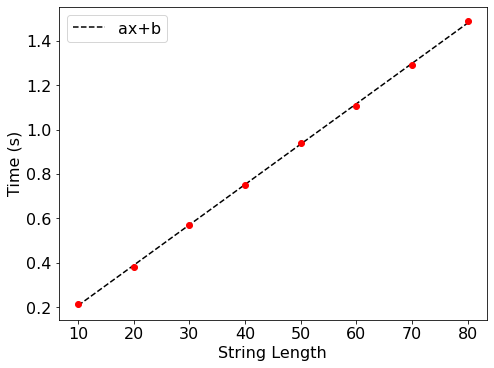

In [10]:
plot_with_curve_fit(
    df_string.index, 
    df_string["Time(s)"], 
    lambda x,a,b: a*x+b,
    axis_set_options={
        "xlabel": "String Length",
        "ylabel": "Time (s)",
    },
    estimate_plot_options={
        "label": "ax+b"
    },
    true_plot_options={
    },
    save_as="var_string_time_plot"
)

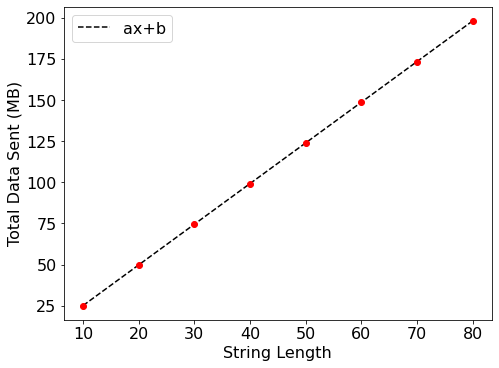

In [11]:
plot_with_curve_fit(
    df_string.index, 
    df_string["Global Data Sent(MB)"], 
    lambda x,a,b: a*x+b,
    axis_set_options={
        "xlabel": "String Length",
        "ylabel": "Total Data Sent (MB)",
    },
    estimate_plot_options={
        "label": "ax+b"
    },
    true_plot_options={
    },
    save_as="var_string_total_data_sent_plot"
)

## Party Size

In [12]:
df_party = pd.read_csv("./Results/Parsed/increasing-party-fixed-others.csv", index_col=0)
df_party = df_party.groupby("# Players").mean()[["Time(s)", "Player-0 Data Sent(MB)", "Global Data Sent(MB)"]]

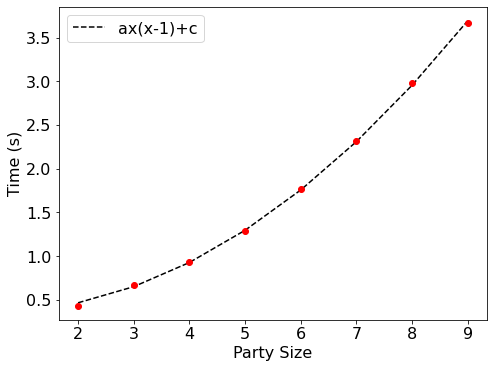

In [13]:
plot_with_curve_fit(
    df_party.index, 
    df_party["Time(s)"], 
    lambda x,a,c: a*x*(x-1)+c,
    axis_set_options={
        "xlabel": "Party Size",
        "ylabel": "Time (s)",
    },
    estimate_plot_options={
        "label": "ax(x-1)+c"
    },
    true_plot_options={
    },
    save_as="var_party_time_plot"
)

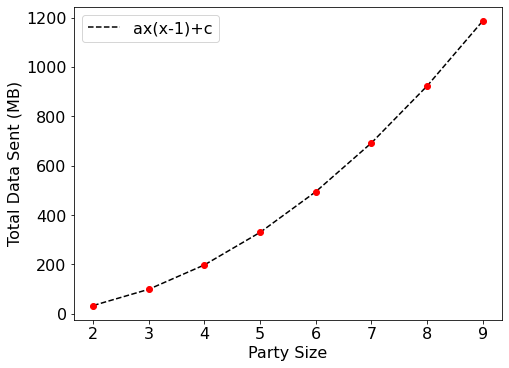

In [14]:
plot_with_curve_fit(
    df_party.index, 
    df_party["Global Data Sent(MB)"], 
    lambda x,a,c: a*x*(x-1)+c,
    axis_set_options={
        "xlabel": "Party Size",
        "ylabel": "Total Data Sent (MB)",
    },
    estimate_plot_options={
        "label": "ax(x-1)+c"
    },
    true_plot_options={
    },
    save_as="var_party_total_data_sent_plot"
)